In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
! unzip /content/data-for-datavis.zip

Archive:  /content/data-for-datavis.zip
  inflating: cancer_b.csv            
  inflating: candy.csv               
  inflating: iris_virginica.csv      
  inflating: insurance.csv           
  inflating: museum_visitors.csv     
  inflating: fifa.csv                
  inflating: flight_delays.csv       
  inflating: iris.csv                
  inflating: ign_scores.csv          
  inflating: iris_versicolor.csv     
  inflating: iris_setosa.csv         
  inflating: spotify.csv             
  inflating: cancer_m.csv            


In [13]:
iris = pd.read_csv('iris.csv',index_col='Id')

In [14]:
iris.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
interquatile_sepal = 6.400000-5.100000 # Q3-Q1
interquatile_sepal

1.3000000000000007

<Axes: >

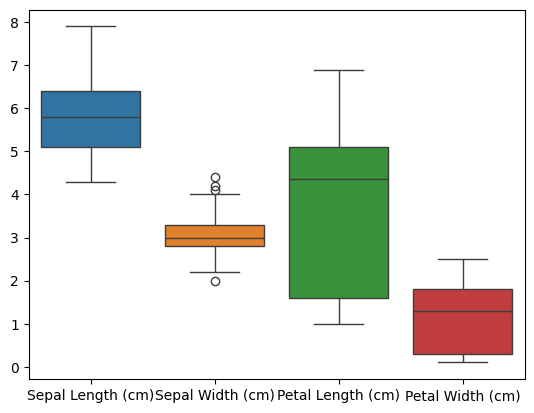

In [18]:
#boxplot
sb.boxplot(data=iris)

<Axes: >

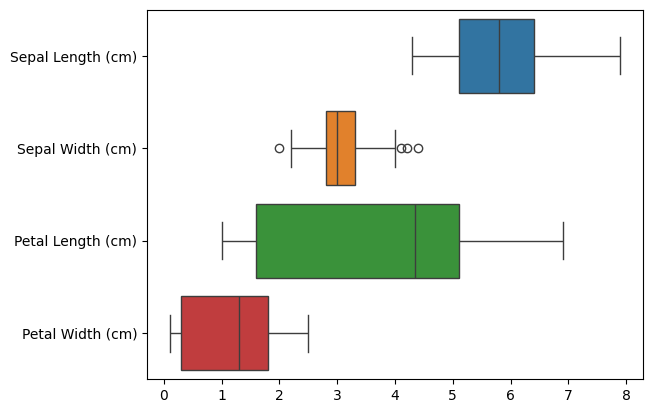

In [21]:
sb.boxplot(data=iris,orient='h') # uses q1-1.5*iqr and q3+1.5*iqr to find outlier

<Axes: >

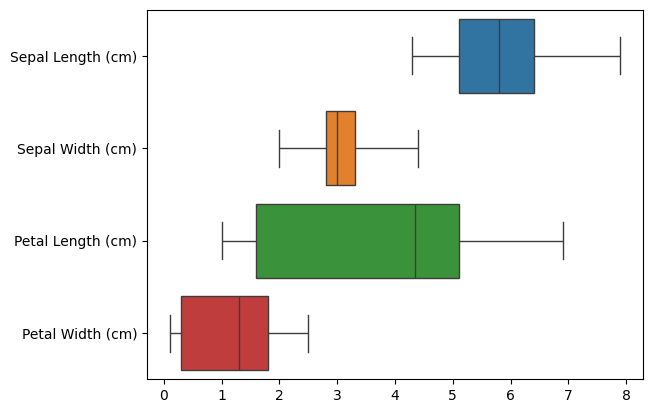

In [40]:
sb.boxplot(data=iris,orient='h',whis=3) # uses q1-3*iqr and q3+3*iqr to find outlier

<Axes: xlabel='Sepal Length (cm)', ylabel='Count'>

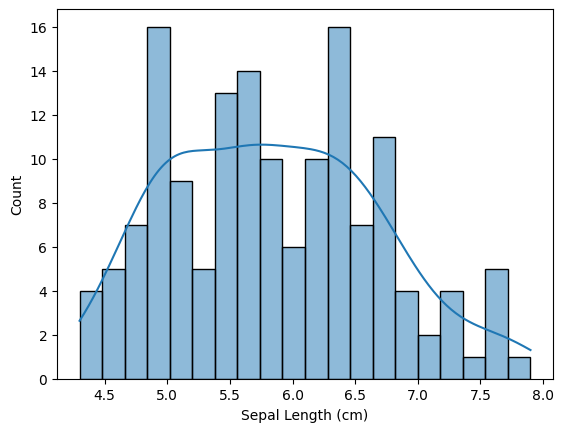

In [27]:
sb.histplot(iris["Sepal Length (cm)"], kde=True, bins=20)

<Axes: xlabel='Sepal Width (cm)', ylabel='Count'>

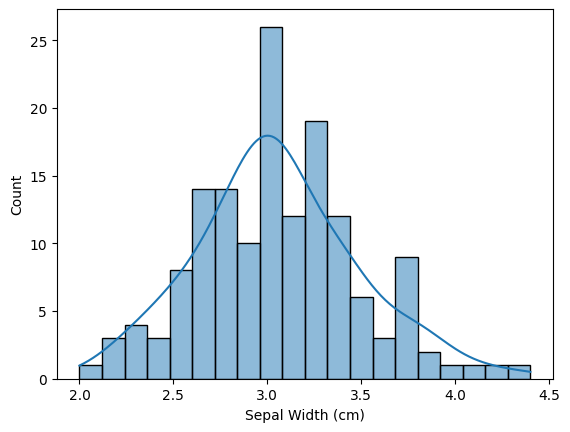

In [31]:
sb.histplot(iris["Sepal Width (cm)"], kde=True, bins=20)

Text(0.5, 1.0, 'Violin Plot of Sepal Length')

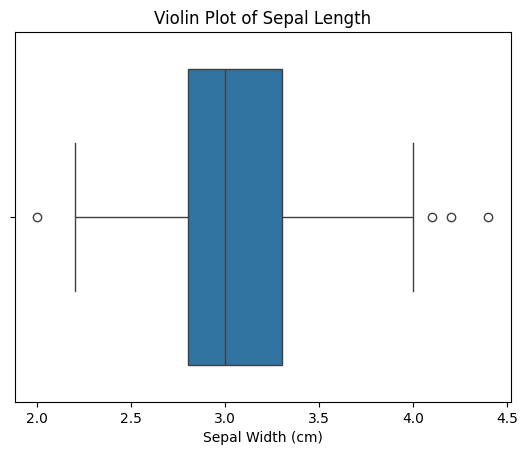

In [39]:
sb.boxplot(iris["Sepal Width (cm)"],orient='h')
plt.title("Violin Plot of Sepal Length")

<Axes: >

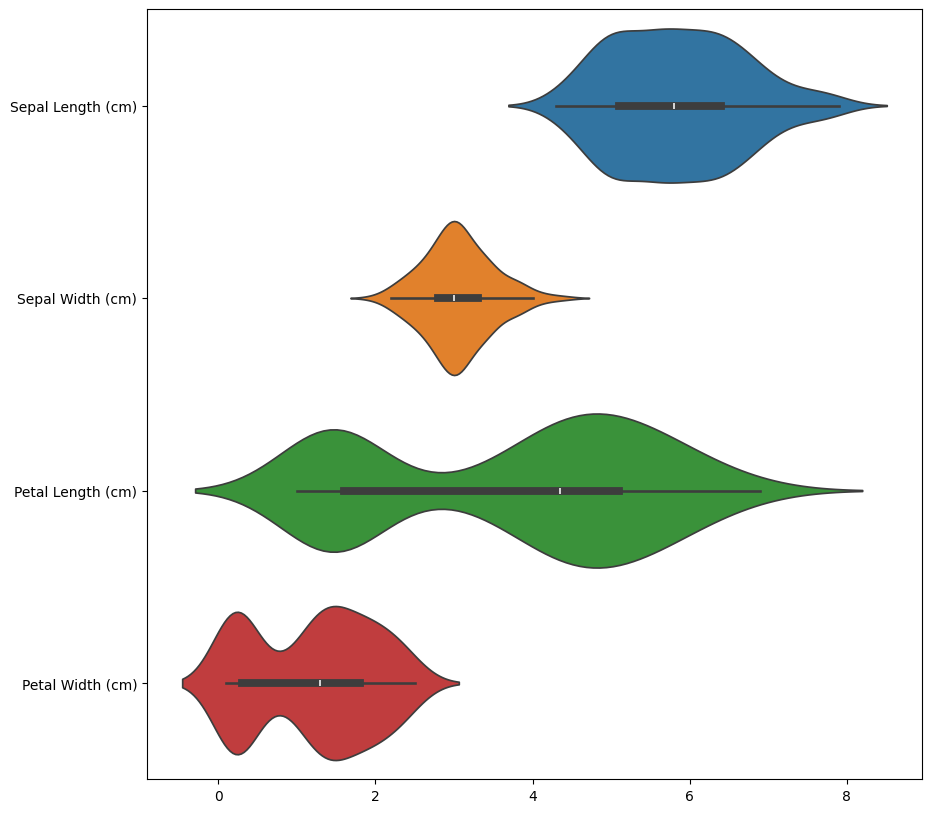

In [46]:
plt.figure(figsize=(10,10))
sb.violinplot(data=iris, inner="box",orient='h')

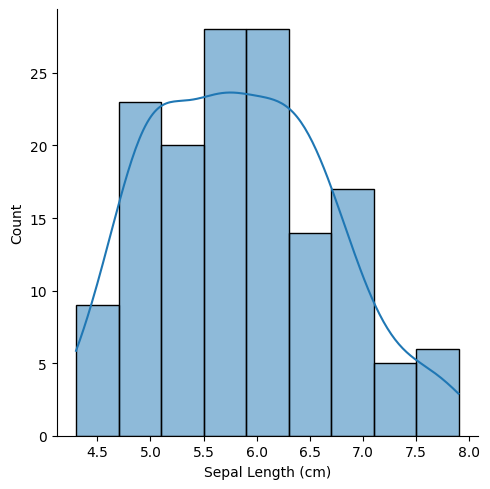

In [49]:
sb.displot(iris['Sepal Length (cm)'],kde = True)

In [50]:
insurance = pd.read_csv("/content/insurance.csv")

In [51]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

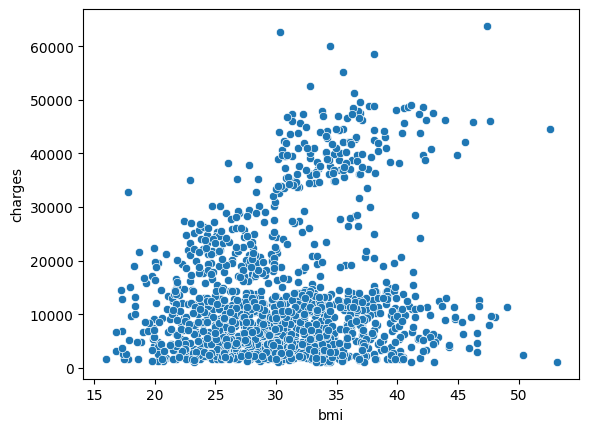

In [52]:
sb.scatterplot(x=insurance['bmi'],y=insurance['charges']) #covary but correlated?

<Axes: xlabel='bmi', ylabel='charges'>

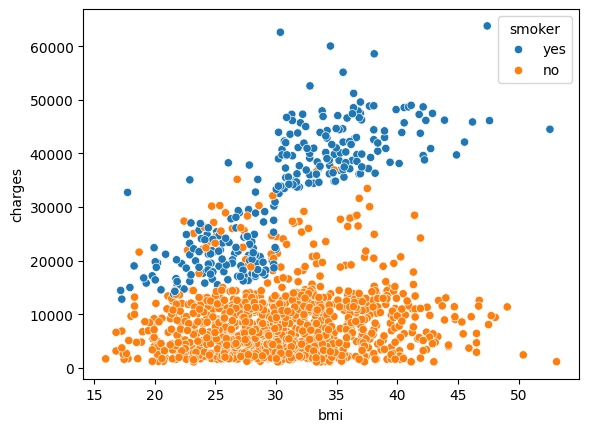

In [53]:
sb.scatterplot(x=insurance['bmi'],y=insurance['charges'],hue=insurance['smoker'])

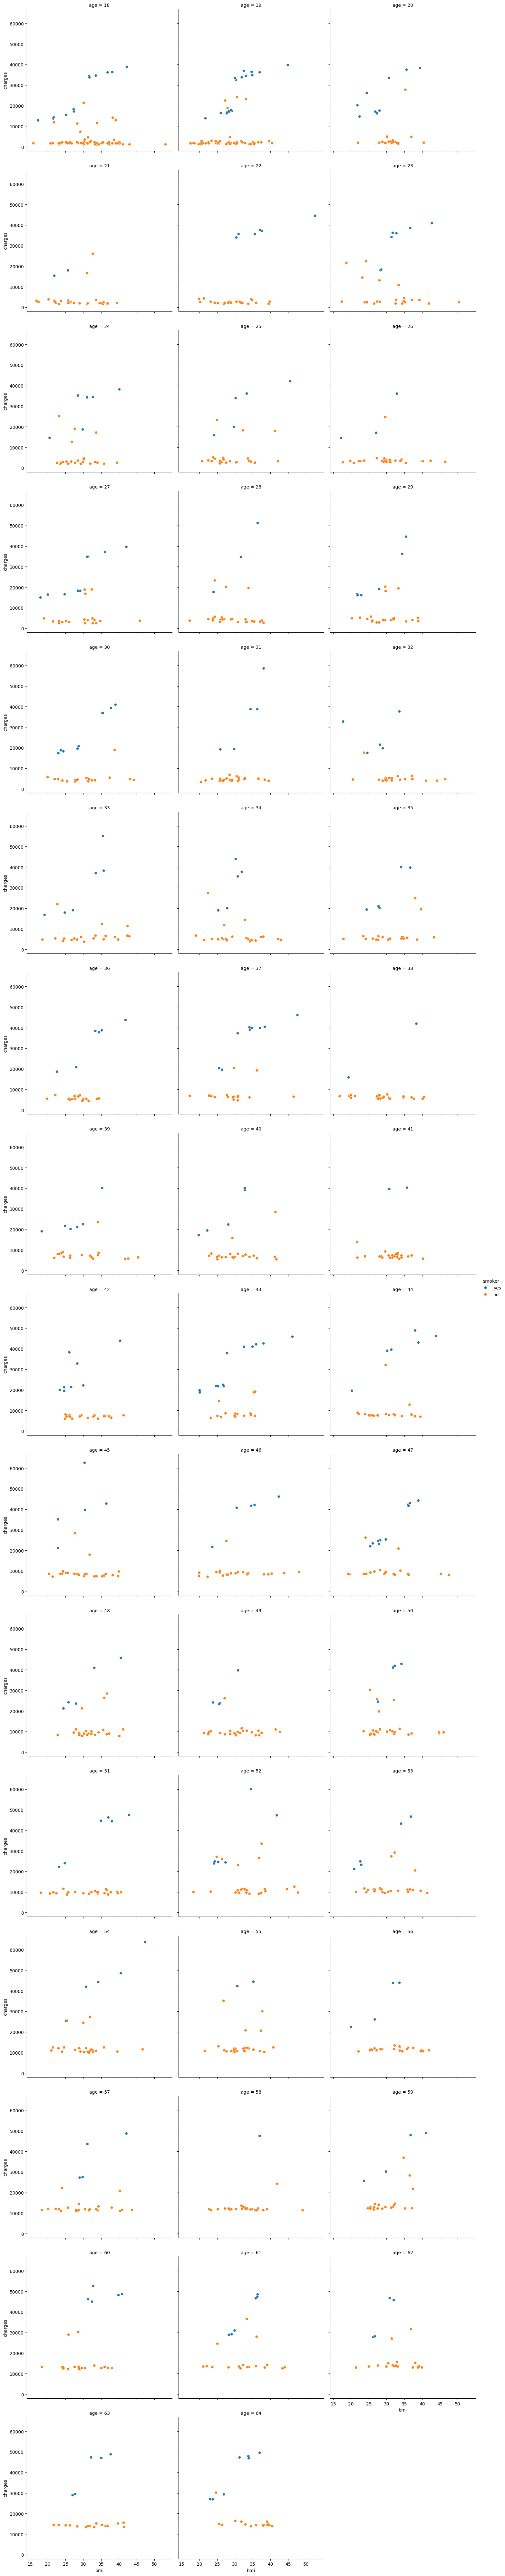

In [59]:
sb.relplot(x='bmi',y='charges',hue='smoker',col='age',col_wrap=3,data=insurance)

In [61]:
insurance_number = insurance.select_dtypes('number')
insurance_number

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [62]:
insurance_number.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [64]:
insurance_number.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='bmi', ylabel='children'>

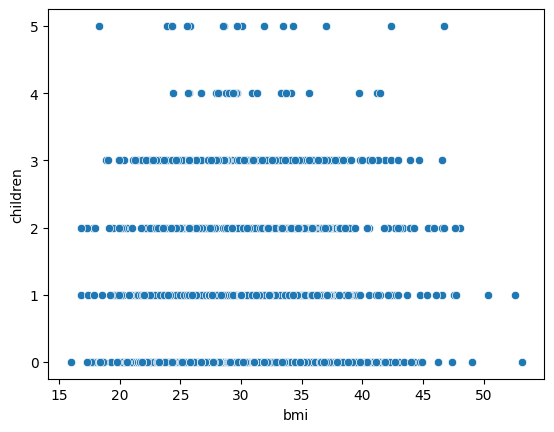

In [65]:
sb.scatterplot(x='bmi',y='children', data = insurance)

<Axes: xlabel='age', ylabel='charges'>

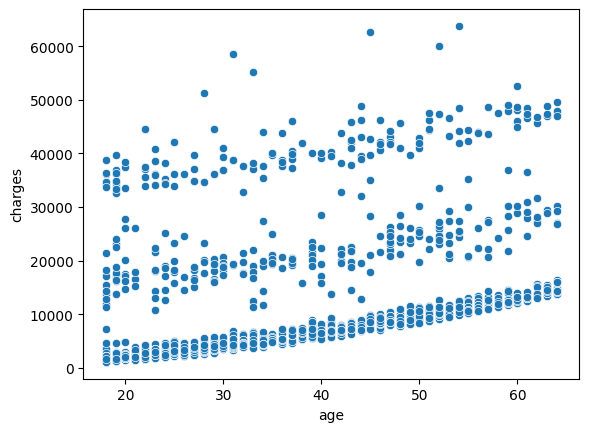

In [70]:
sb.scatterplot(x='age',y='charges', data = insurance)

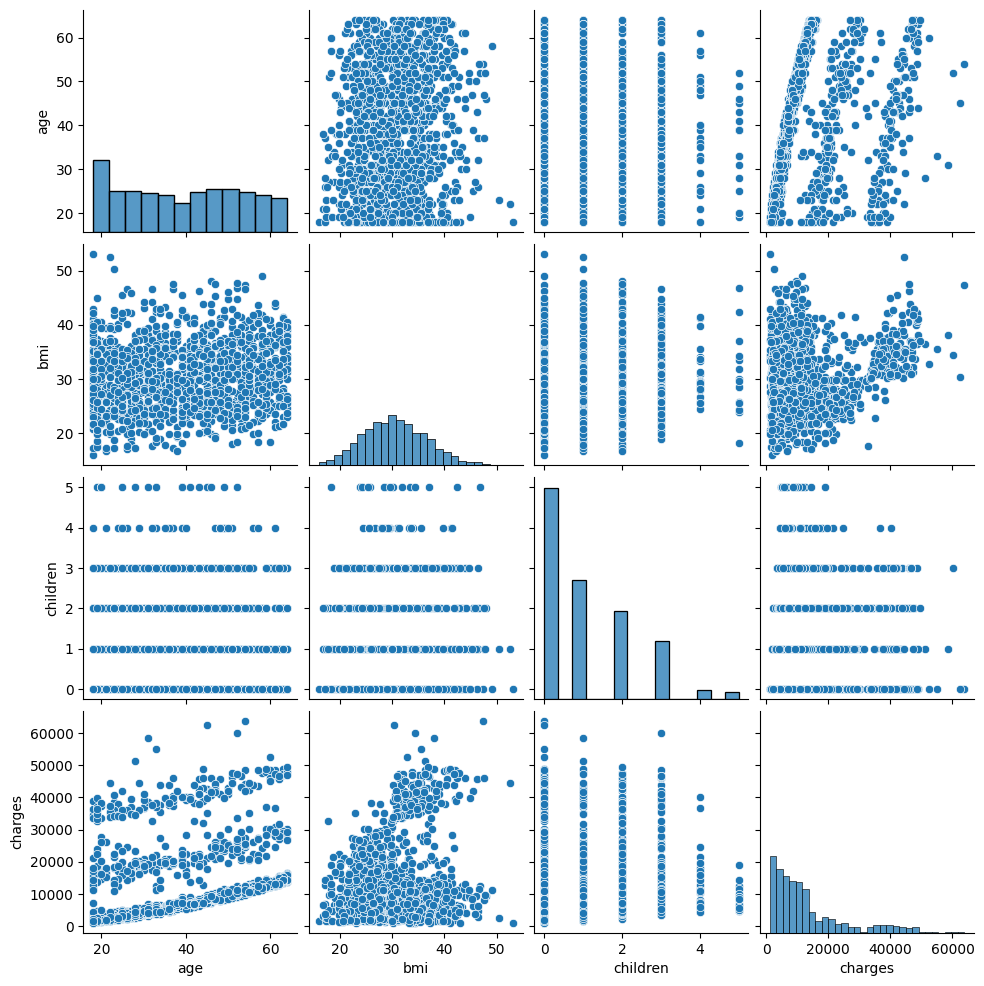

In [72]:
sb.pairplot(data=insurance_number)